# Verifying the revised error-correction terms

Lemme make this short: We are going to plot 15 things and they should all be nearly EXACTLY 1:1 x-y lines.

X: new estimated error (i.e., the median of the JAPERMAG3ERR, etc. columns)
Y: measured error (i.e., the rms of the JAPERMAG3 column)

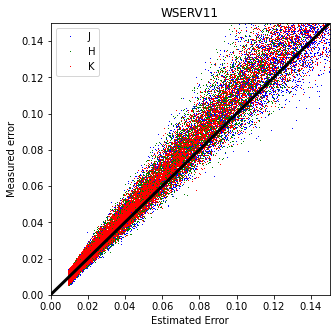

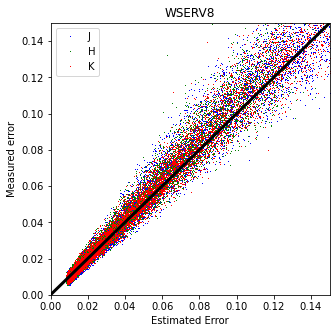

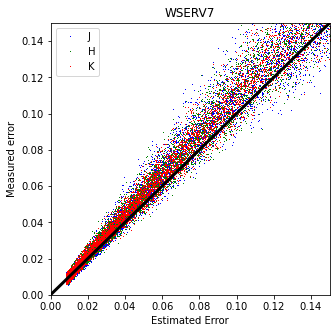

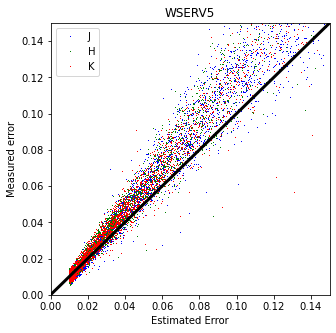

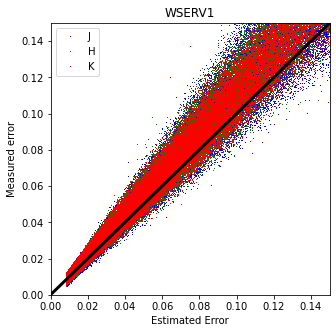

In [6]:
# In this one, we're not going to plot anything. We're just going to spit out the s, c, and uncertainty values.
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
np.warnings.filterwarnings('ignore')

from wuvars.analysis.rederive_error_correction import bin_the_median_errorbars_by_magnitude

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

wserv_ids = [1, 5, 7, 8, 11]
for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(output_path, key='table')
    q2_all_indices_nonvariable = (
        (ds["count"]["N_J"] >= 50)
        & (ds["count"]["N_J"] < 150)
        & (ds["count"]["N_H"] >= 50)
        & (ds["count"]["N_H"] < 150)
        & (ds["count"]["N_K"] >= 50)
        & (ds["count"]["N_K"] < 150)
        & (ds["mean"]["JAPERMAG3"] > 11)
        & (ds["mean"]["HAPERMAG3"] > 11)
        & (ds["mean"]["KAPERMAG3"] > 11)
        & (ds["count"]["N_J"] == ds["count"]["N_J_good"] + ds["count"]["N_J_info"])
        & (ds["count"]["N_H"] == ds["count"]["N_H_good"] + ds["count"]["N_H_info"])
        & (ds["count"]["N_K"] == ds["count"]["N_K_good"] + ds["count"]["N_K_info"])
        & (ds["median"]["PSTAR"] > 0.75)
        & (ds['variability']['J_red_chisq'] < 2)
        & (ds['variability']['H_red_chisq'] < 2)
        & (ds['variability']['K_red_chisq'] < 2)
    )
    dsn = ds[q2_all_indices_nonvariable]

    fig, ax = plt.subplots(1, figsize=(5,5))
    colors=['b','g','r']
    for i, b in enumerate(["J", "H", "K"]):
        ax.plot(dsn['median'][f'{b}APERMAG3ERR'], dsn['std'][f'{b}APERMAG3'], f'{colors[i]},', label=b)
#     plt.plot(E_array, M_array, 'k+')
    xs = [0, 1]
    plt.plot(xs, xs, 'k', lw=3, )

#     xs = np.linspace(0, 0.25, 200)
#     ys = np.sqrt(c*xs**2 + s**2)
#     ax.plot(xs, ys, 'k:', lw=0.5, label=f'New error-correction: $M^2 = cE^2 + s^2$.\n$c={c:.3f}$, $s={s:.4f}$')

    ax.set_ylabel("Measured error")
    ax.set_xlabel("Estimated Error")
    ax.set_title(f"WSERV{wserv}")
    ax.set_ylim(0, 0.15)
    ax.set_xlim(0, 0.15)
    ax.legend()
    
    

'/Users/tsrice/Documents/Variability_Project_2020/wuvars/analysis/prototypes'